## Home Take Exam 1:
### Nonlinear Dynamics
### Admir Makas

In [1]:
#Import necessary sympy toolboxes
#from sympy import *
#from sympy.matrices import *
import sympy as sp
import sympy.matrices as mt

#init_printing(use_latex='mathjax')

In [2]:
from sympy.abc import e, m, k, g, l, u
#sp.init_printing()
u1=sp.Symbol('u1')
u2=sp.Symbol('u2')
e, m, k, g, l, u= sp.symbols("e m k g l u")

sp.init_printing(use_latex='mathjax')

The given function is expressed below in terms of $\dot{u_2}$, which will be used to solve for fixed points.

In [3]:
F_o = (-(e*u1*u2**2)/(1-u1**2)**2 - (k*u1)/m - (e*g*u1)/(l*(1-u1**2)**(1/2)))/(1+(e*u1**2)/(1-u1**2))
F_o

                    -0.5                      
         ⎛    2    ⎞                2         
  e⋅g⋅u₁⋅⎝- u₁  + 1⎠         e⋅u₁⋅u₂      k⋅u₁
- ────────────────────── - ──────────── - ────
            l                         2    m  
                           ⎛    2    ⎞        
                           ⎝- u₁  + 1⎠        
──────────────────────────────────────────────
                      2                       
                  e⋅u₁                        
                ───────── + 1                 
                    2                         
                - u₁  + 1                     

For the above expression set $u_2=0$ to solve for roots of the equation.

In [4]:
Roots = sp.solve(F_o.subs({'u2': 0}).evalf(), u1)
Roots

⎡            __________________        __________________⎤
⎢           ╱    2  2  2              ╱    2  2  2       ⎥
⎢          ╱    e ⋅g ⋅m              ╱    e ⋅g ⋅m        ⎥
⎢0.0, -   ╱   - ──────── + 1.0 ,    ╱   - ──────── + 1.0 ⎥
⎢        ╱        2  2             ╱        2  2         ⎥
⎣      ╲╱        k ⋅l            ╲╱        k ⋅l          ⎦

The given ODE has 3 roots as seen above. Once the Taylor expansion function is defined the given roots will be evaluated.

Below function F will be expanded to $3^{rd}$ order. The given function has  
been rearranged in terms of $\dot{u_2}$. Function is expressed in terms of $u_1$ and $u_2$.

In [5]:
F = ((k*u1)/m + (e*u1*u2**2)/(u1**2 - 1)**2 + (e*g*u1)/(l*(1 - u1**2)**(1/2)))/((e*u1**2)/(u1**2 - 1) - 1)
F

                  -0.5                    
       ⎛    2    ⎞               2        
e⋅g⋅u₁⋅⎝- u₁  + 1⎠        e⋅u₁⋅u₂     k⋅u₁
────────────────────── + ────────── + ────
          l                       2    m  
                         ⎛  2    ⎞        
                         ⎝u₁  - 1⎠        
──────────────────────────────────────────
                    2                     
                e⋅u₁                      
               ─────── - 1                
                 2                        
               u₁  - 1                    

Python code to perform multi-variable Taylor expansion for the above expression.  
In this version terms $(u_1-a)$ & $(u_2-b)$ are replaced with $y_1$ and $y_2$ for simplicity. For the code following expression was used.

$f(\vec{x}) = \frac{df}{du_1}y_1 + \frac{df}{du_2}y_2$  
$\ \ \ \ \ \ +\frac{1}{2!}(\frac{d^2f}{du_1 du_1}y_1^2 + 2\frac{d^2f}{du_1 du_2}y_1y_2 + \frac{d^2f}{du_2 du_2}y_2^2$)  
$\ \ \ \ \ \ +\frac{1}{3!}(\frac{d^3f}{du_1 du_1 du_1}y_1^3 + 3\frac{d^3f}{du_1 du_1 du_2}y_1^2y_2 + 3\frac{d^3f}{du_1 du_2 du_2}y_2^2y_1 + \frac{d^3f}{du_2 du_2 du_2}y_2^3)$

In [6]:
def taylor_series(f=sp.cos(u1)*sp.sin(u2), var = [u1, u2]):
    q=len(var)
    symbolList = ['y'+ str(l) for l in range(q)]
    terms = []
    
    for j in range(len(var)):
                result1=(1/sp.factorial(1) * sp.diff(f, var[j], 1) * sp.Symbol(symbolList[j]))
                terms.append(result1)
    for k in range(len(var)):
        for l in range(len(var)):
                result2=(1/sp.factorial(2) * sp.diff(f, var[k], 1, var[l], 1) * sp.Symbol(symbolList[k]) * sp.Symbol(symbolList[l]))
                terms.append(result2)
    for m in range(len(var)):
            for n in range(len(var)):
                for p in range(len(var)):
                    result3=(1/sp.factorial(3) * sp.diff(f, var[m], 1, var[n], 1, var[p], 1) * sp.Symbol(symbolList[m]) * sp.Symbol(symbolList[n]) * sp.Symbol(symbolList[p]))
                    terms.append(result3)            
    
    final_ans = sum(terms)
    #print(final_ans)
    return(final_ans)

$\dot{u_2}$ expanded to $3^{rd}$ order calculated in line below. Full result not shown due to size of output.

In [7]:
dy2 = taylor_series(f=F, var = [u1, u2])

## First Fixed Point
Expression for $\dot{y_2}$ at $1^{st}$ fixed point $(0, 0)$ is calculated next line.

In [8]:
fix_pt1 = dy2.subs({'u1': 0, 'u2': 0}).evalf()
fix_pt1

                           3 ⎛  -6.0⋅(-1)⋅e⋅g   3.0⋅g   -6.0⋅(-1)⋅k⎞          
- - -0.166666666666667⋅e⋅y₀ ⋅⎜- ───────────── + ───── - ───────────⎟ - e⋅y₀⋅y₁
                             ⎝        l           l          m     ⎠          

2      ⎛  e⋅g   k⎞
  + y₀⋅⎜- ─── - ─⎟
       ⎝   l    m⎠

Just as a way to further confirm that function "taylor_series" is working correctly $\dot{u_1}$ was also expanded and gave the expected result.

In [9]:
u1=sp.Symbol('u1')
u2=sp.Symbol('u2')
dy1 = taylor_series(f=u2, var = [u1, u2])
dy1

y₁

In the next step above two expressions for $\dot{y_2}$ and $\dot{y_1}$ are solved numerically.

In [10]:
%matplotlib inline

import pylab
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eq_solv(IN1 = 'y1', IN2 = '-0.166666666666667*e*y0**3*(-6.0*e*g/l + 3.0*g/l - 6.0*k/m) - e*y0*y1**2 + y0*(-e*g/l - k/m)',\
            l=1, m=1, g=9.81, k=1, e=0.1, x0=1, v0=1, max_time=1):
    
    def deriv(y0_y1, t, l = l, m = m, g = g, k = k, e = e):
        y0, y1 = y0_y1
        return [eval(IN1), eval(IN2)]

    #Join initial conditions into one matrix with 2 columns
    x0 = np.concatenate((x0, v0), axis = 1)
    
    #Set N to number of rows in x0
    N = x0.shape[0]
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    
    x_t = np.asarray([sc.integrate.odeint(deriv, x0i, t)
                      for x0i in x0])

    for i in range(N):
        x, v = x_t[i,:,:].T            
        plt.plot(x, v,'-')
        #Let's plot '*' at the end of each trajectory.
        plt.plot(x[-1],v[-1],'*')
        plt.grid('on')
    
    return t, x_t

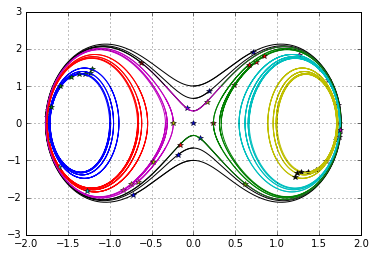

In [11]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-1.0, 1.0, numx)
v = np.linspace(-1.0, 1.0, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '-0.166666666666667*e*y0**3*(-6.0*e*g/l + 3.0*g/l - 6.0*k/m) - e*y0*y1**2 + y0*(-e*g/l - k/m)',\
            l=1, m=1, g=-9.81, k=1, e=1.0, x0 = x0, v0 = v0, max_time=3)

Any point lying at (0, 0) stays there indefinitely. In the neighborhood of the point the fixed point (0, 0) there appears to be a saddle point.  
<br>
At points ($\pm1.3, 0)$ there appear to be peroidic solutions.  
<br>
In next set of code numerical solution to the original ODE is simulated for comparison.

In [12]:
def eq_solv2(IN1 = 'u2', IN2 = '(-e*g*u1*(-u1**2 + 1)**(-0.5)/l - e*u1*u2**2/(-u1**2 + 1)**2 - k*u1/m)/(e*u1**2/(-u1**2 + 1) + 1)'\
             , l=1, m=1, g=9.81, k=1, e=0.1, x0=1, v0=1, max_time=1):
    
    def deriv(u1_u2, t, l = l, m = m, g = g, k = k, e = e):
        u1, u2 = u1_u2
        return [eval(IN1), eval(IN2)]

    #Join initial conditions into one matrix with 2 columns
    x0 = np.concatenate((x0, v0), axis = 1)
    
    #Set N to number of rows in x0
    N = x0.shape[0]
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    
    x_t = np.asarray([sc.integrate.odeint(deriv, x0i, t)
                      for x0i in x0])

    for i in range(N):
        x, v = x_t[i,:,:].T            
        plt.plot(x, v,'-')
        #Let's plot '*' at the end of each trajectory.
        plt.plot(x[-1],v[-1],'*')
        plt.grid('on')
    
    return t, x_t

C:\Users\ado\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\ado\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:156: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


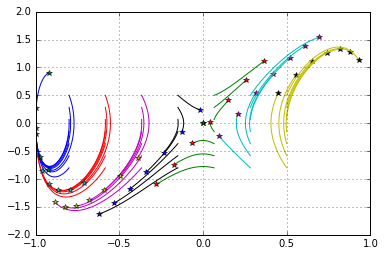

In [13]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-0.8, 0.5, numx)
v = np.linspace(-0.8, 0.5, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv2(IN1 = 'u2', IN2 = '(-e*g*u1*(-u1**2 + 1)**(-0.5)/l - e*u1*u2**2/(-u1**2 + 1)**2 - k*u1/m)/(e*u1**2/(-u1**2 + 1) + 1)'\
               , l=1, m=1, g=-9.81, k=1, e=1, x0=x0, v0=v0, max_time=.4)

Comparing the two plots seems to yield similar shape. The region about (0,0) seems to have a saddle point and there also appear to be periodic solutions on the edges of the graph.  
<br>
One distinct difference is that the latter graph is bounded between -1 and 1. This is expected due to the fact that the original expression has a term $\sqrt{1-u_1^2}$ that will cause an undefined region at these locations.  
<br>
The fact that the Taylor expansion solution is not bounded could be the result of the expansion.

## Second Fixed Point  
Expression for $\dot{y_2}$ at $2^{nd}$ fixed point $(\sqrt{\frac{\epsilon^2*g^2*m^2}{k^2*l^2} - 1},\  0)$ is calculated in the next line.  
The output is hidden due to size.

In [14]:
fix_pt2 = dy2.subs({'u1': (-e**2*g**2*m**2/(k**2*l**2) + 1.0)**(1/2), 'u2': 0}).evalf()
#fix_pt2

At this stationary point 3 cases are going to be tested, Since $g$ is assumed to be acceleration of gravity (9.81) the 3 cases will take on following expressions:  

- $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} > 0$; real
- $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} = 0$  
- $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} < 0$; imaginary  

To create the 3 cases above control parameters to be varied are $\epsilon$ and $k$.  

### Case 1 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} > 0$:  
To get a positive number under the radical following values were chosen for the parameters:

- $\epsilon$ = 0.5
- $k$ = 3
- $l$ = 3
- $m$ = 1

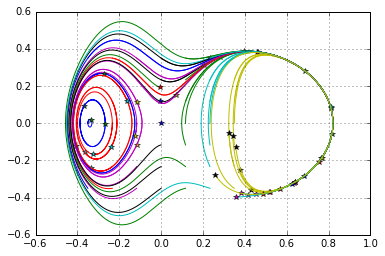

In [15]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-0.35, 0.35, numx)
v = np.linspace(-0.35, 0.35, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((-2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=3, m=1, g=-9.81, k=3, e=0.5, x0 = x0, v0 = v0, max_time=4.0)

When the fixed point gives a real value the trajectories around the point  
seem to give periodic solutions. Any solutions close to the fixed point will orbit about the point.

The solution space looks similar to the solution given by original ODE. Point (0, 0) is still acting as a saddle point.

One other observation is the fact that as value of $\epsilon$ approaches 0 the system becomes unstable.

### Case 2 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} = 0$:  
To get a positive number under the radical following values were chosen for the parameters:

- $\epsilon$ = 0.9174126036
- $k$ = 3
- $l$ = 3
- $m$ = 1

Paramaters above were chosen which will yield the closest value to 1. Due to roundoff error the value may not be exactly 1 but it will be sufficiently close over a small integration time to hopefully infer some properties of the phase plane.

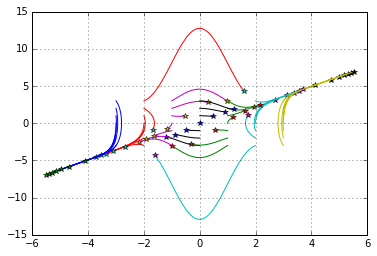

In [16]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-3.0, 3.0, numx)
v = np.linspace(-3.0, 3.0, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((-2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=3, m=1, g=-9.81, k=3, e=0.9174126036, x0 = x0, v0 = v0, max_time=0.50)

For case #2 there appear to be no periodic solutions. Rather all the solutions cnoverge to the manifolds that start in the center and tend to go into infinity.  
Ofcourse the displacemet is limited to 1 only so this graph does not appear to be true to the system.

### Case 3 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} < 0$:  
To get a negative number under the radical following values were chosen for the parameters:

- $\epsilon$ = 1
- $k$ = 2
- $l$ = 2
- $m$ = 1

C:\Users\ado\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  ixpr, mxstep, mxhnil, mxordn, mxords)


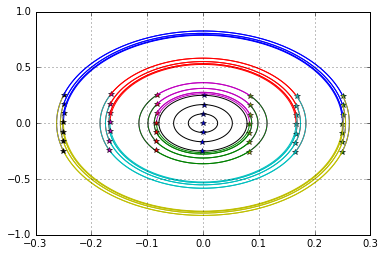

In [17]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-0.25, 0.25, numx)
v = np.linspace(-0.25, 0.25, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((-2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=2, m=1, g=-9.81, k=2, e=1, x0 = x0, v0 = v0, max_time=1.0)

The imaginary roots produce periodic solutions all centered at (0,0).

## Third Fixed Point  
Expression for $\dot{y_2}$ at $3^{rd}$ fixed point $(-\sqrt{\frac{\epsilon^2*g^2*m^2}{k^2*l^2} - 1},\  0)$ is calculated in the next line.  
The output is hidden due to size.

In [18]:
fix_pt3 = dy2.subs({'u1': -(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**(1/2), 'u2': 0}).evalf()
#fix_pt3

### Case 1 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} > 0$:  
To get a positive number under the radical following values were chosen for the parameters:

- $\epsilon$ = 0.5
- $k$ = 3
- $l$ = 3
- $m$ = 1

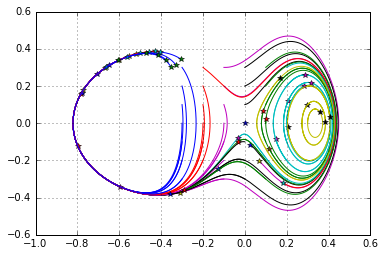

In [19]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-0.3, 0.3, numx)
v = np.linspace(-0.3, 0.3, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) - 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(-e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l - k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=3, m=1, g=-9.81, k=3, e=0.5, x0 = x0, v0 = v0, max_time=4.0)

### Case 2 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} = 0$:  
To get a positive number under the radical following values were chosen for the parameters:

- $\epsilon$ = 0.9174126036
- $k$ = 3
- $l$ = 3
- $m$ = 1

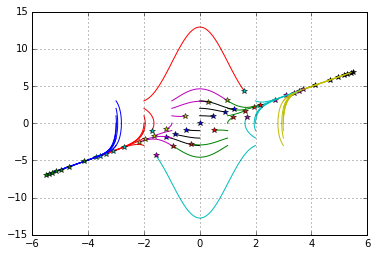

In [ ]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-3.0, 3.0, numx)
v = np.linspace(-3.0, 3.0, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) - 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(-e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l - k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=3, m=1, g=-9.81, k=3, e=0.9174126036, x0 = x0, v0 = v0, max_time=0.50)

### Case 3 $\Longrightarrow$  $\sqrt{1- \frac{96.24\epsilon^2 m^2}{k^2 l^2}} < 0$:  
To get a negative number under the radical following values were chosen for the parameters:

- $\epsilon$ = 1
- $k$ = 2
- $l$ = 2
- $m$ = 1

In [ ]:
# Make a grid of starting points
numx = 7
numv = 7
x = np.linspace(-0.25, 0.25, numx)
v = np.linspace(-0.25, 0.25, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv(IN1 = 'y1', IN2 = '0.166666666666667*e*y0**3*(48.0*e**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**3*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**3) + 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 6.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 24.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 18.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 15.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-3.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 24.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-3.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 2.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - 6.0*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) - 0.5*e*y0**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(8.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + 3.0*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-2.5)/l + 3.0*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + 4.0*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 2.0*(e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)*(-5.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**2.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2 + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)))/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0) + e*y0*y1**2*(2.0*e*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)) - 4.0*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) + 1.0)/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) - e*y1**2*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)*((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2) + y0*((2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 2.0*e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.5/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0)**2)*(-e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l - k*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**0.5/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0)**2 + (1.0*e*g*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-1.5)/l + e*g*(-(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 + 1.0)**(-0.5)/l + k/m)/(e*(-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0/((-e**2*g**2*m**2/(k**2*l**2) + 1.0)**1.0 - 1.0) - 1.0))',\
            l=2, m=1, g=-9.81, k=2, e=1, x0 = x0, v0 = v0, max_time=1.0)

As expected plot results for **point 3** is very similar to **point 2**.  

## Problems From Inclass Portion:  

Find following items for given problems:

- Find all fixed points.
- Determine nature of manifolds in the vicinity of the fixed points and their direction.
- Determine whether the flow is dissipative, conservative, or expanding.
- Sketch phase plane.



## Problem 1:

$\ddot{x} - x + x^3 = 0$  

$\dot{x_1} = x_2$  
$\dot{x_2} = x_1 - x_1^3$

State space expression.

$$\begin{bmatrix}
\dot{x_1} \\
\dot{x_2} \\
\end{bmatrix}
=\begin{bmatrix}
0   &   1\\
1  &   0\\
\end{bmatrix}
\begin{bmatrix}
x_1      \\
x_2      \\
\end{bmatrix}
+\begin{bmatrix}
0              \\
-x_1^{3}        \\
\end{bmatrix}
$$

Calculate fixed points

In [ ]:
x1=sp.Symbol('x1')
x2=sp.Symbol('x2')
F=sp.solve(-x1+x1**3, x1)
F

Linearize the system

In [ ]:
X=sp.Matrix([x2, x1 - x1**3])
Y=sp.Matrix([x1, x2])
J=X.jacobian(Y)
J

### Point (0, 0)

Evaluate J at point (0,0) and determine eigenvalues and eigenvectors

In [ ]:
JF1 = J.subs({'x1': 0, 'x2': 0}).evalf()

eigvec = JF1.eigenvects()
(val1,n,[vect1]),(val2,n2,[vect2])=eigvec

vect1r = []
vect2r = []

for x in vect1:
    vect1r.append(round(x,3))
for x in vect2:
    vect2r.append(round(x,3))
    
print(round(val1,3))
print(vect1r)
print('\n')
print(round(val2,3))
print(vect2r)

Next plot phase diagram and eigenvectors, which will identify manifold directions at point (0,0).

In [ ]:
def eq_solv3(IN1 = 'x2', IN2 = 'x1 - x1**3', max_time=1, x0=1, v0=1):
    
    def deriv(x1_x2, t):
        x1, x2 = x1_x2
        return [eval(IN1), eval(IN2)]

    #Join initial conditions into one matrix with 2 columns
    x0 = np.concatenate((x0, v0), axis = 1)
    
    #Set N to number of rows in x0
    N = x0.shape[0]
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    
    x_t = np.asarray([sc.integrate.odeint(deriv, x0i, t)
                      for x0i in x0])

    for i in range(N):
        x, v = x_t[i,:,:].T            
        plt.plot(x, v,'-')
        #Let's plot '*' at the end of each trajectory.
        plt.plot(x[-1],v[-1],'*')
        plt.grid('on')
    
    return t, x_t

In [ ]:
# Make a grid of starting points
numx = 10
numv = 10
x = np.linspace(-1, 1, numx)
v = np.linspace(-1, 1, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv3(IN1 = 'x2', IN2 = 'x1-x1**3', max_time=3.0, x0=x0, v0=v0)

x=np.linspace(-1,1,20)
plt.plot(x, x, '-',label = '$E^u$', linewidth=4)
plt.plot(x, -x, '-',label = '$E^s$', linewidth=4)
plt.axis([-1, 1, -1, 1])

At point (0, 0) there is a saddle point. Plotted eigenvectors show that in the vicinity of (0, 0) the manifolds are tangent.

The saddle point occurs because there are both negative and positive eigenvalues.

## Points (1, 0) and (-1, 0)

Evaluate J at point (1, 0) and determine eigenvalues and eigenvectors.  Similar response will occur at (-1, 0).

In [ ]:
JF2 = J.subs({'x1': 1, 'x2': 0}).evalf()

eigvec = JF2.eigenvects()
(val1,n,[vect1]),(val2,n2,[vect2])=eigvec

vect1r = []
vect2r = []

for x in vect1:
    if isinstance(x, float):
        vect1r.append(round(x))
    else:
        vect1r.append(x)
        
for x in vect2:
    if isinstance(x, float):
        vect2r.append(round(x))
    else:
        vect2r.append(x)
        
print(val1)
print(vect1r)
print('\n')
print(val2)
print(vect2r)

In [ ]:
# Make a grid of starting points
numx = 10
numv = 10
x = np.linspace(-1, 1, numx)
v = np.linspace(-1, 1, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv3(IN1 = 'x2', IN2 = 'x1-x1**3', max_time=3.0, x0=x0, v0=v0)

At points (1, 0) and (-1, 0) the eigenvalues are only imaginary and as a results at these fixed points centers are visible.

### Divergence:  
$\frac{dF_1}{dx_1} + \frac{dF_2}{dx_2}\ gives\ 0 + 0 = 0$, therefore the system is conservative.

## Problem 2:

$\ddot{x} + sin(x) = 0$  

$\dot{x_1} = x_2$  
$\dot{x_2} = -sin(x_1)$

State space expression.

$$\begin{bmatrix}
\dot{x_1} \\
\dot{x_2} \\
\end{bmatrix}
=\begin{bmatrix}
0   &  1\\
0  &   0\\
\end{bmatrix}
\begin{bmatrix}
x_1      \\
x_2      \\
\end{bmatrix}
+\begin{bmatrix}
0              \\
-sin(x_1)        \\
\end{bmatrix}
$$

Calculate fixed points

In [ ]:
x1=sp.Symbol('x1')
x2=sp.Symbol('x2')
F=sp.solve(sp.sin(x1), x1)
F

Linearize the system

In [ ]:
X=sp.Matrix([x2, -sp.sin(x1)])
Y=sp.Matrix([x1, x2])
J=X.jacobian(Y)
J

### Point (0, 0)

Evaluate J at point (0,0) and determine eigenvalues and eigenvectors

In [ ]:
JF1 = J.subs({'x1': 0, 'x2': 0}).evalf()

eigvec = JF1.eigenvects()
(val1,n,[vect1]),(val2,n2,[vect2])=eigvec

vect1r = []
vect2r = []

for x in vect1:
    if isinstance(x, float):
        vect1r.append(round(x))
    else:
        vect1r.append(x)
        
for x in vect2:
    if isinstance(x, float):
        vect2r.append(round(x))
    else:
        vect2r.append(x)
        
print(val1)
print(vect1r)
print('\n')
print(val2)
print(vect2r)

Next plot phase diagram.

In [ ]:
# Make a grid of starting points
numx = 10
numv = 10
x = np.linspace(-5, 5, numx)
v = np.linspace(-2, 2, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv3(IN1 = 'x2', IN2 = '-np.sin(x1)', max_time=6.0, x0=x0, v0=v0)
plt.axis([-10, 10, -3, 3])

Since all eigenvalues are complex there is a center at point (0, 0).  
From this graph it is also evident that the solution is periodic.

### Point ($\pi$, 0)

Evaluate J at point ($\pi$,0) and determine eigenvalues and eigenvectors

In [ ]:
JF1 = J.subs({'x1': sp.pi, 'x2': 0}).evalf()

eigvec = JF1.eigenvects()
(val1,n,[vect1]),(val2,n2,[vect2])=eigvec

vect1r = []
vect2r = []

for x in vect1:
    if isinstance(x, float):
        vect1r.append(round(x))
    else:
        vect1r.append(x)
        
for x in vect2:
    if isinstance(x, float):
        vect2r.append(round(x))
    else:
        vect2r.append(x)
        
print(val1)
print(vect1r)
print('\n')
print(val2)
print(vect2r)

In [ ]:
# Make a grid of starting points
numx = 10
numv = 10
x = np.linspace(-5, 5, numx)
v = np.linspace(-2, 2, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv3(IN1 = 'x2', IN2 = '-np.sin(x1)', max_time=6.0, x0=x0, v0=v0)
plt.axis([-10, 10, -3, 3])

x=np.linspace(-3,3,20)
plt.plot(x+sp.pi, x, '-',label = '$E^u$', linewidth=4)
plt.plot(x+sp.pi, -x, '-',label = '$E^s$', linewidth=4)
plt.axis([1.5, 4.5, -3, 3])

At point ($\pi$, 0) there is a saddle point. Plotted eigenvectors show that in the vicinity of ($\pi$, 0) the manifolds are tangent.

The saddle point occurs because there are both negative and positive eigenvalues.

### Divergence:  
$\frac{dF_1}{dx_1} + \frac{dF_2}{dx_2}\ gives\ 0 + 0 = 0$, therefore the system is conservative.

## Problem 3:  

$\dot{x_1} = x_1 + 2x_2$  
$\dot{x_2} = 3x_1 + 2x_2$

State space expression.

$$\begin{bmatrix}
\dot{x_1} \\
\dot{x_2} \\
\end{bmatrix}
=\begin{bmatrix}
1   &  2\\
3  &   2\\
\end{bmatrix}
\begin{bmatrix}
x_1      \\
x_2      \\
\end{bmatrix}
$$

Find eigenvalues and eigenvectors

In [ ]:
M=sp.Matrix([[1, 2], [3, 2]])

eigvec = M.eigenvects()
(val1,n,[vect1]),(val2,n2,[vect2])=eigvec

vect1r = []
vect2r = []

for x in vect1:
    if isinstance(x, float):
        vect1r.append(round(x))
    else:
        vect1r.append(x)
        
for x in vect2:
    if isinstance(x, float):
        vect2r.append(round(x))
    else:
        vect2r.append(x)
        
print(val1)
print(vect1r)
print('\n')
print(val2)
print(vect2r)

In [ ]:
# Make a grid of starting points
numx = 10
numv = 10
x = np.linspace(-5, 5, numx)
v = np.linspace(-5, 5, numv)
x0, v0 = np.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = eq_solv3(IN1 = 'x1 + 2*x2', IN2 = '3*x1 + 2*x2', max_time=3.0, x0=x0, v0=v0)
plt.axis([-10, 10, -10, 10])

x=np.linspace(-12,12,20)
plt.plot(-x, x, '-',label = '$E^u$', linewidth=4)
plt.plot((2/3)*x, x, '-',label = '$E^s$', linewidth=4)

Since there are both positive and negative eigenvalues the solution will exhibit a sadle point. For the linear system all solutions appear to get parallel to the eigenvectors.

### Divergence:  
$\frac{dF_1}{dx_1} + \frac{dF_2}{dx_2}\ gives\ 1 + 2 = 3$, therefore the system is expanding.

**To see code please look at the file submitted on the repository.**

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')